In [104]:
# Big Data Final Project - Fire Analysis - Paraguay - POC

In [105]:
# all necesary imports
import folium
from folium import plugins
import webbrowser
import json
import numpy as np
import pandas as pd
from folium.plugins import MarkerCluster

In [62]:
# First step is to read the data set

In [63]:
fires = pd.read_excel('./Fires.xlsx')
fires

,Id,Date,Magnitud,Causes,Precipitation,Wind Direction,Wind Speed,L-5,L-4,L-3,...,H+2,H+3,H+4,H+5,Latitude,Longitude,Location,Rural,Urban,National Park
0,INC-001,2022-01-26,4.00,fogata,0.0,S,14.48,26.0,26.0,26.0,...,33,34,37,39,-25.3772,-57.6124,Puerto Pabla,0,1,0
1,INC-002,2022-01-25,40.00,quema de pastizales,12.3,E,11.26,24.0,25.0,25.0,...,31,28,30,32,-25.6362,-54.8690,Minga Guazu,1,0,0
2,INC-003,2022-01-24,7.00,quema de pastizales,3.9,S,14.48,29.0,25.0,26.0,...,42,31,33,34,-25.2469,-57.6466,Chaco'i,1,0,0
3,INC-004,2022-01-19,6.53,sequia,0.0,NaN,0.00,26.0,26.0,27.0,...,39,41,42,43,-26.4068,-57.1224,Villa Florida,1,0,0
4,INC-005,2022-01-17,300.00,sequia,0.0,S,45.06,23.0,25.0,24.0,...,40,38,38,40,-26.5348,-57.0257,San Miguel,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,INC-096,2019-09-21,50.00,quema de pastizales,0.0,SSE,4.98,28.0,21.0,19.0,...,35,37,25,33,-21.0467,-57.8745,Fuerte Olimpo,1,0,0
96,INC-097,2019-09-24,3.50,intervencion humana,0.0,E,14.99,15.0,16.0,13.0,...,30,34,33,36,-25.9989,-55.7829,Cordillera del Ybytyruzu,0,0,1
97,INC-098,2019-09-30,0.00,intervencion humana,0.0,ENE,25.99,19.0,19.0,20.0,...,31,30,31,30,-26.0735,-55.7462,Parque Nacional de Caazapa,0,0,1
98,INC-099,2019-10-01,0.00,intervencion humana,0.0,ENE,25.99,19.0,20.0,23.0,...,30,31,30,32,-26.0735,-55.7462,Parque Nacional de Caazapa,0,0,1


In [64]:
fires.shape

(100, 35)

In [65]:
fires_no_null = fires.dropna()

In [66]:
fires_no_null.shape

(78, 35)

In [168]:
# Lets try a K-Means

In [169]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [170]:
# Manual Feature seleccion, for waht we are trying to cluster, based on weather? lets see what we get.
df = fires_no_null[['Magnitud','Precipitation','Wind Direction','Wind Speed',
           'L-5','L-4','L-3', 'L-2', 'L-1', 'L', 'L+1', 'L+2', 'L+3', 'L+4', 'L+5', 'H-5', 'H-4',
            'H-3', 'H-2', 'H-1', 'H', 'H+1', 'H+2', 'H+3', 'H+4', 'H+5', 'Rural', 'Urban', 'National Park']]

# One-hot encoding for categorical variables, which in this case is only wind direction.
x = pd.get_dummies(df)

# Normalization to a scale between [0-1]
min_max_scaler = preprocessing.MinMaxScaler()
xNorm = pd.DataFrame(min_max_scaler.fit_transform(x.values))
xNorm.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.001658,0.000000,0.269295,0.88,1.000000,0.708333,1.000000,0.730769,0.692308,0.689655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.016577,1.000000,0.192354,0.80,0.941176,0.666667,0.941176,0.653846,0.576923,0.655172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002901,0.317073,0.269295,1.00,0.941176,0.708333,1.000000,0.692308,0.692308,0.758621,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.124327,0.000000,1.000000,0.76,0.941176,0.625000,0.823529,0.730769,0.730769,0.827586,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.124327,0.000000,1.000000,0.68,0.823529,0.666667,0.882353,0.576923,0.730769,0.758621,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


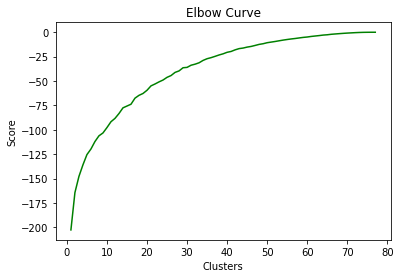

In [171]:
# Elbow curve setup
nc = range(1,78) # Lets try and see what the number of clusters should be for our analysis
kmeans = [KMeans(n_clusters=i) for i in nc] # List comprehension for a list of kmeans with different clusters to try
score = [kmeans[i].fit(xNorm).score(xNorm) for i in range(len(kmeans))]

plt.plot(nc, score, color='green')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [172]:
kmeans = KMeans(n_clusters=75, random_state=1) # 25 seems okay based on the graph above
kmeans.fit(xNorm)
print("Score: " + str(kmeans.score(xNorm)))
print(kmeans.labels_)
print(kmeans.cluster_centers_)

clusters = pd.DataFrame(min_max_scaler.inverse_transform(kmeans.cluster_centers_), columns=x.columns)

clusters

Score: -0.04748712141824781
[17 25 56  8 41 66 65  9 31 14 46 20 43 68  3 19 51 34 72 61  2 60 10 53
 23 64 26 37 52 42  6 21 49 22 35 15 74  0 15 24 45 11 59 13 33 39 32 48
 36 62 50 57 44 71 29 54 27  7 58 55  4 18 67 63  5  5 38 73 12 47 30 16
 40 28 70 69 69  1]
[[2.07211799e-03 0.00000000e+00 6.15292712e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.07211799e-04 2.76422764e-01 3.05376344e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.14423599e-02 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.14423599e-02 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.80318609e-02 0.00000000e+00 3.29271207e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.90096519e-03 0.00000000e+00 6.15292712e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


,Magnitud,Precipitation,Wind Speed,L-5,L-4,L-3,L-2,L-1,L,L+1,...,Wind Direction_N,Wind Direction_N,Wind Direction_NE,Wind Direction_NW,Wind Direction_S,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_WNW
0,5.00,0.0,28.96,22.0,15.0,13.0,15.0,13.0,21.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.50,3.4,15.99,20.0,23.0,22.0,20.0,20.0,23.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.00,0.0,45.06,22.0,23.0,20.0,23.0,23.0,24.0,26.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,50.00,0.0,28.96,22.0,17.0,24.0,21.0,24.0,20.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.00,0.0,7.00,23.0,25.0,18.0,16.0,15.0,19.0,15.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,3.50,0.0,14.99,15.0,16.0,13.0,12.0,14.0,17.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,3.00,0.0,12.98,16.0,12.0,18.0,18.0,19.0,19.0,18.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
72,100.00,0.0,45.06,24.0,21.0,24.0,20.0,23.0,23.0,24.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
73,212.42,0.0,16.99,15.0,24.0,19.0,17.0,19.0,22.0,20.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# not really conclusive, what if we try and estimate the magnitude based on the data we have. 
# Time for some regressions

In [122]:
# Import modules for regresion
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time


from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV

from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import ARDRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [133]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LassoLarsIC', LassoLarsIC()))
models.append(('ElasticNetCV', ElasticNetCV()))
models.append(('Ridge', Ridge()))
models.append(('CART', DecisionTreeRegressor()))

In [145]:
xt = fires_no_null[['Magnitud','Precipitation','Wind Speed',
           'L-5','L-4','L-3', 'L-2', 'L-1', 'L', 'L+1', 'L+2', 'L+3', 'L+4', 'L+5', 'H-5', 'H-4',
            'H-3', 'H-2', 'H-1', 'H', 'H+1', 'H+2', 'H+3', 'H+4', 'H+5', 'Rural', 'Urban', 'National Park']]
xtt = pd.get_dummies(xt)
# xtt = xt

xtt.shape

(78, 28)

In [146]:
xtt = preprocessing.StandardScaler().fit_transform(xtt.sample(frac=0.1))
x = xtt[:,1:29]
y = xtt[:,0]

In [147]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=0.2, random_state=7)


In [152]:
results = []
names = []
r2 = []
times = []
for name, model in models:
 
  kfold = model_selection.KFold(n_splits=6)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
   
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
  s = time.time()    
  model.fit(x_train, y_train)
  y_pred_test = model.predict(x_validation)
  r2s = r2_score(y_validation, y_pred_test)
  e = time.time()
  t = e - s
  times.append(t)
  print('time: ', t)
  r2.append(r2s)
  print('r2: ' + str(r2s) + '\n')


LR: -2.975174 (3.138748)
time:  0.0007507801055908203
r2: -15715.431128912856

LassoLarsIC: -1.903537 (2.900491)
time:  0.0016090869903564453
r2: -73950.06061661842

ElasticNetCV: -1.789527 (2.954522)
time:  0.00865483283996582
r2: -73950.06061661842

Ridge: -2.822699 (3.060146)
time:  0.000202178955078125
r2: -10420.465517275801

CART: -2.714772 (3.814804)
time:  0.0001761913299560547
r2: -17.036056076096408



/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4

In [153]:
# Okay no real conclusions r squared values are all over the place?.. what about regression as neuralnetwork


In [160]:
data = fires_no_null[['Magnitud','Precipitation','Wind Speed',
           'L-5','L-4','L-3', 'L-2', 'L-1', 'L', 'L+1', 'L+2', 'L+3', 'L+4', 'L+5', 'H-5', 'H-4',
            'H-3', 'H-2', 'H-1', 'H', 'H+1', 'H+2', 'H+3', 'H+4', 'H+5', 'Rural', 'Urban', 'National Park']]
data = pd.get_dummies(xt)
# xtt = xt

print(data.shape)

# Calculate variables with positive or negative correlation greater than a threshold
corMatrix = data.corr()

corMatrix[(abs(corMatrix) > 0.10) & (corMatrix < 1)]['Magnitud'].dropna()

(78, 28)


L-2      0.237805
L-1      0.225773
L+3      0.108634
H-5     -0.123393
H-3      0.182048
H-2      0.212654
H-1      0.191634
H+2      0.165037
Urban   -0.106083
Name: Magnitud, dtype: float64

18
78
(18, 17)
(18, 3)


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


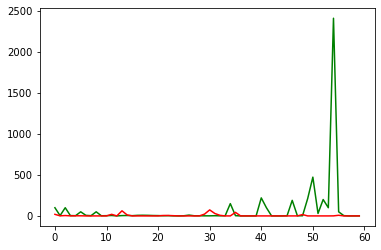

Coeficiente r2: 0.5472993771411315
Coeficiente de Pearson (r): 0.7397968485612327
Overfitting!!
Raíz del Error cuadrático Medio (RMSE): 323.82441218685386


KeyError: 'cantidad'

In [166]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 

# PCA
# PCA quitando variables cantidad(-1) a (-11) para evitar un autoregressive model
df1 = data.iloc[:,11:78] #input
df2 = data.iloc[:,78:] #input
df3 = data.iloc[:,0:1] #cantidad
df = pd.concat([df1,df2,df3], axis=1)

#training / validation
# 276 registros para train, 52 para validacion (52 semanas equivalente a 1 año)
# última columna es el target, todas las previas son input
col = df.shape[1] #18
print(col)
total = df.shape[0] #78
print(total)
n = 18
x = df.iloc[0:n,0:col-1]
x_val = df.iloc[n:,0:col-1]
y = df.iloc[0:n,col-1:col]
y_val = df.iloc[n:,col-1:col]

# Crear PCA que explica el 98% de varianza acumulada
pca = PCA(n_components=0.90, svd_solver='full')
print(x.shape) #antes del PCA
x = pca.fit_transform(x)
print(x.shape) #despues del PCA
x_val = pca.transform(x_val)

# entrenar el modelo y calcular predicciones
# Documentación de parámetros: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
model = MLPRegressor(hidden_layer_sizes=(100), max_iter=10,
                  activation='relu', solver='lbfgs', random_state=1)

model.fit(x, y['Magnitud'])
y_pred = model.predict(x_val)
y_pred[y_pred < 0] = 0 # La NN puede lanzar valores negativos, normalizar a 0 esos casos

# graficar serie real y predicción
semanas = range(total-n)
plt.plot(semanas, y_val, color='green') # REAL
plt.plot(semanas, y_pred, color='red') # PREDICCION
plt.show()

# calcular coeficiente r2 y pearson
print("Coeficiente r2: " + str(model.score(x, y)))
print("Coeficiente de Pearson (r): " + str(sqrt(model.score(x, y))))
print("Overfitting!!")

# calcular root mean square error (RMSE)
print("Raíz del Error cuadrático Medio (RMSE): " + str(sqrt(mean_squared_error(y_val, y_pred))))
print("Media de Cantidad: " + str(y_val['cantidad'].mean()))
print("% de error: " + str(sqrt(mean_squared_error(y_val, y_pred)) / y_val['cantidad'].mean()))

In [119]:

# deploy map
m = folium.Map(location=[-23.442503,-58.443832],
                            zoom_start=8)


In [120]:
codigo = list (fires["Id"])
latitud = list (fires["Latitude"])
longitud = list (fires["Longitude"])

mc_fp = MarkerCluster()


In [121]:
for cod,lat,lon in zip(codigo,latitud,longitud):
    mc_fp.add_child(folium.Marker(location=[lat,lon],
    popup="<b> Nombre: </b>"+str(cod)+"<br> <b> Incendio: <b>"+str(cod)+"</br>",max_width=4000, min_width=4000,
       ))

Capa_fp = folium.FeatureGroup(name='Fires')
mc_fp.add_to(Capa_fp)

m.add_child(Capa_fp)

In [30]:
# Base map layers
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Cartodb Positron').add_to(m)
folium.TileLayer('Cartodb dark_matter').add_to(m)
folium.TileLayer('Stamentoner').add_to(m)

folium.LayerControl(position='topleft').add_to(m)

In [31]:
m.save('mapa_interactivo.html')
webbrowser.open('mapa_interactivo.html')


True